Important prerequisite: install qiskit (pip install qiskit)

In [1]:
import numpy as np
from qiskit import *
from matplotlib import pyplot as plt
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}

Go to IBM Q platform (https://quantum-computing.ibm.com/) and create your id. Then collect your access token

In [32]:
IBMQ.save_account('<here goes your token>')   # you need to do this only once

In [3]:
IBMQ.load_account()    # you will need this only if you want to run your algorithm on a real quantum backend

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Choosing quantum backend

In [4]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
from qiskit.tools.monitor import backend_monitor,backend_overview
backend_overview()

/Users/sashalazarevic/opt/anaconda3/envs/Qiskit/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:377: UserWarning: `rep_time` now has units of seconds(s) rather than microseconds(mu s).
  warnings.warn('`rep_time` now has units of seconds(s) rather '
/Users/sashalazarevic/opt/anaconda3/envs/Qiskit/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:355: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


ibmq_armonk                  ibmq_essex                   ibmq_burlington
-----------                  ----------                   ---------------
Num. Qubits:  1              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 4              Pending Jobs: 4
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      182.4          Avg. T1:      103.6          Avg. T1:      70.9
Avg. T2:      215.8          Avg. T2:      132.7          Avg. T2:      65.8



ibmq_london                  ibmq_ourense                 ibmq_vigo
-----------                  ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 4              Pending Jobs: 7              Pending Jobs: 2
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           O

In [7]:
backend = provider.get_backend("ibmq_16_melbourne")
backend_monitor(backend)

ibmq_16_melbourne
Configuration
-------------
    n_qubits: 15
    operational: True
    status_msg: active
    pending_jobs: 10
    backend_version: 2.0.5
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    allow_object_storage: True
    memory: True
    quantum_volume: None
    allow_q_object: True
    max_experiments: 75
    allow_q_circuit: False
    online_date: 2018-11-06T05:00:00+00:00
    n_registers: 1
    backend_name: ibmq_16_melbourne
    conditional: False
    sample_name: albatross
    description: 15 qubit device
    open_pulse: False
    coupling_map: [[0, 1], [0, 14], [1, 0], [1, 2], [1, 13], [2, 1], [2, 3], [2, 12], [3, 2], [3, 4], [3, 11], [4, 3], [4, 5], [4, 10], [5, 4], [5, 6], [5, 9], [6, 5], [6, 8], [7, 8], [8, 6], [8, 7], [8, 9], [9, 5], [9, 8], [9, 10], [10, 4], [10, 9], [10, 11], [11, 3], [11, 10], [11, 12], [12, 2], [12, 11], [12, 13], [13, 1], [13, 12], [13, 14], [14, 0], [14, 13]]
    max_shots: 8192
    url: None
    c

### Create quantum circuit

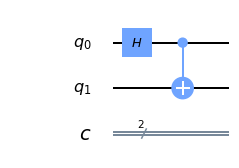

In [8]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

#### This is the first Bell state of two entangled qubits
  
\$
\frac{1}{\sqrt2}(|00⟩+|11⟩)
\$

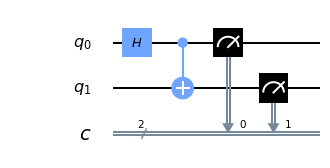

In [9]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

JobStatus.RUNNING
JobStatus.RUNNING
{'11': 503, '00': 497}


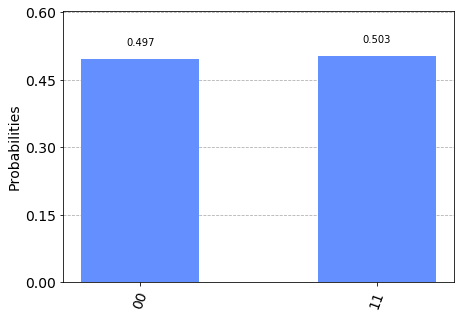

In [10]:
sim = BasicAer.get_backend('qasm_simulator')
job = execute(qc, sim, shots=1000)

print(job.status())
print(job.status())

results = job.result().get_counts()

print(results)
plot_histogram(results)

If the measurement of one qubit shows the |0> state, the second qubit will also fall in the same state. Idem for state |1>. This is the result of quantum entanglement where two qubits are perfectly correlated

#### Let's implement the second Bell state of two entangled qubits 
  
\$
\frac{1}{\sqrt2}(|00⟩-|11⟩)
\$

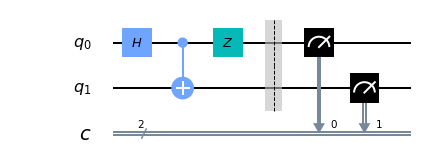

In [36]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.z(q[0])

qc.barrier()

qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw(output = 'mpl')

{'00': 515, '11': 485}


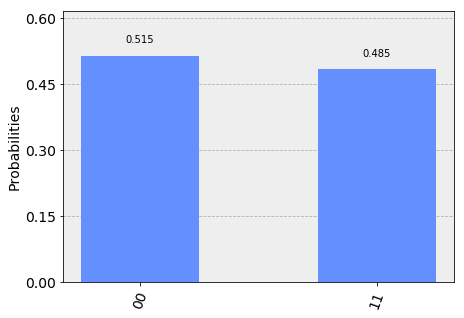

In [14]:
job = execute(qc, qasm_sim, shots=1000)
results = job.result().get_counts()
print(results)

plot_histogram(results)

#### Let's implement the third Bell state of two entangled qubits
  
\$
\frac{1}{\sqrt2}(|01⟩+|10⟩)
\$

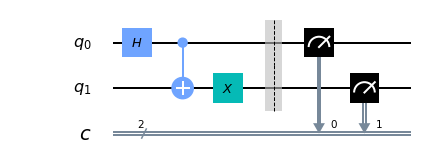

In [37]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.x(q[1])

qc.barrier()

qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw(output='mpl')

{'10': 487, '01': 513}


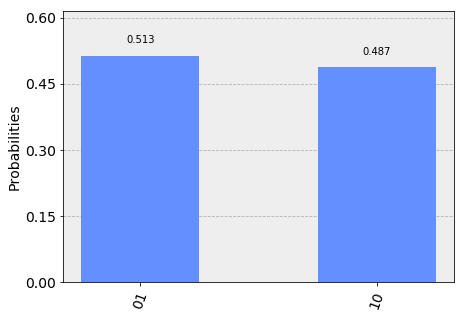

In [16]:
job = execute(qc, qasm_sim, shots=1000)
results = job.result().get_counts()
print(results)

plot_histogram(results)

#### Let's implement the fourth Bell state of two entangled qubits - Exercise
  
\$
\frac{1}{\sqrt2}(|01⟩-|10⟩)
\$

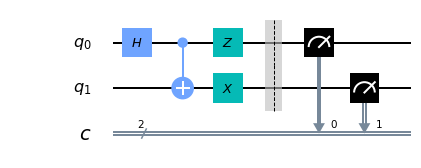

In [39]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

### YOUR CODE HERE (4 Lines)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.z(q[0])
qc.x(q[1])

### END YOUR CODE

qc.barrier()

qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw(output = 'mpl')

{'10': 477, '01': 523}


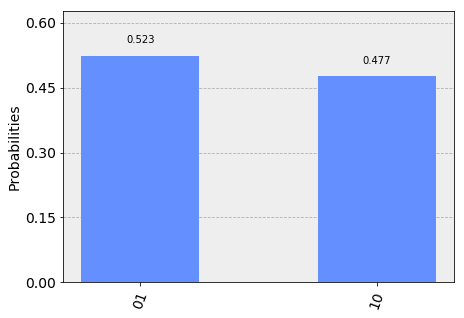

In [21]:
job = execute(qc, qasm_sim, shots=1000)
results = job.result().get_counts()
print(results)

plot_histogram(results)

### Bit addition Exercise


We know that   
0 + 0 = 00   
0 + 1 = 01   
1 + 0 = 01  
1 + 1 = 10  
<br>
Classically we need four operations to calculate the sum of two bits. 
Quantum bit addition will use one operation to perform all four calculations at once  
<br>
Implement the addition of two bits using three qubits operations

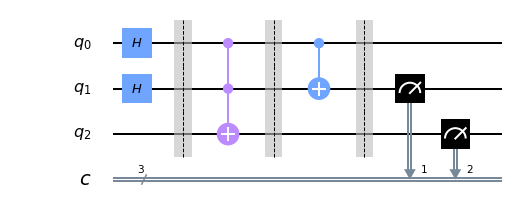

In [11]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc=QuantumCircuit(q, c)

### YOUR CODE HERE (6-9 Lines)
### Use qc.barrier() between your Hadamard gate and Toffoli, between Toffoli and CX, and before measurements

qc.h(q[0])
qc.h(q[1])
qc.barrier()
qc.ccx(q[0], q[1], q[2])
qc.barrier()
qc.cx(q[0], q[1])
qc.barrier()
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

### END YOUR CODE

qc.draw(output='mpl')

{'000': 254, '010': 478, '100': 268}


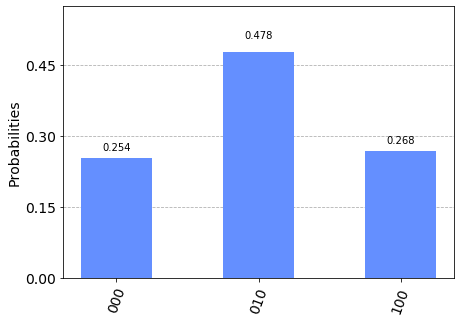

In [12]:
job = execute(qc, sim, shots=1000)
results = job.result().get_counts()
print(results)

plot_histogram(results)

#### We can initialize the circuit using values from an array

In [13]:
ket2=np.array([1/np.sqrt(2)+0.j, 0.+0.j, 0.+0.j, 1/np.sqrt(2)+0.j])
ket2

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

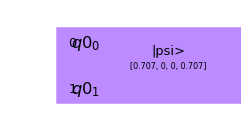

In [14]:
qr2 = QuantumRegister(2)
new_qc = QuantumCircuit( qr2)

new_qc.initialize( ket2, qr2 )

new_qc.draw(output='mpl')

### Single-qubit visualization with Bloch Sphere

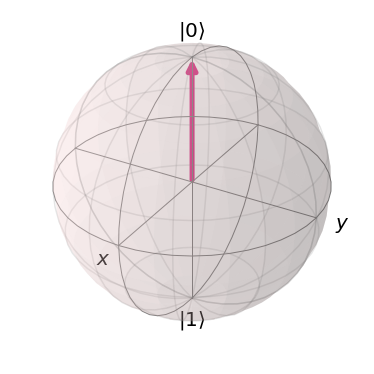

In [15]:
plot_bloch_vector([0, 0, 1])

#### To visualize a qubit, we need to measure its state against all three bases

In [16]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0)

#### Let's rotate the quantum state of our qubit around all three axes

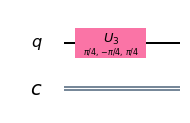

In [17]:
qc = QuantumCircuit(1,1)
qc.u3(np.pi/4, -(np.pi/4), np.pi/4, 0)
qc.draw(output='mpl')

In [18]:
shots = 2**14 

bloch_vector = []
for measure_circuit in [measure_x, measure_y, measure_z]:

    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

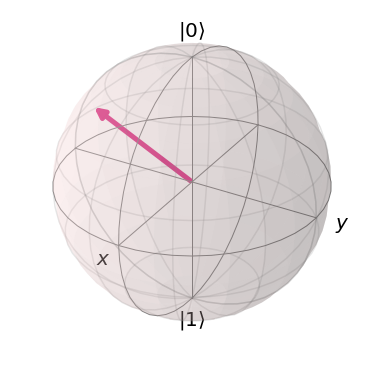

In [19]:
plot_bloch_vector( bloch_vector )

# Part 2

### Deutsch's Problem  
f(x) constant or balanced ?  
Constant -> f(0) = f(1) = 0 or f(0) = f(1) = 1  
Balanced -> f(0) = 0 and f(1) = 1, or f(1) = 0 and f(0) = 1  

### Deutsch's Algorithm
1: Initialize qubit x in state |0〉  
2: Initialize qubit y in state |1〉Use X gate  
3: Apply the Hadamard gate H to both qubits  
4: Apply the circuit Uf  
5: Apply the Hadamard gate H on qubit x  
6: Measure qubit x.   

If x is |0〉, the function is constant. If it is |1〉, the function is balanced

### Circuit with constant function 
Constant function giving zero. Circuit is implemented with identity function

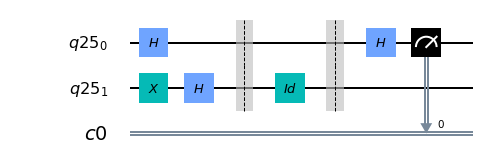

In [28]:
q=QuantumRegister(2)
qc=QuantumCircuit(q)
c=ClassicalRegister(1)
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
    
qc.barrier()
### YOUR CODE HERE (1 Line)
qc.iden(q[1])
### END YOUR CODE
qc.barrier()
    
qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output = 'mpl')

In [30]:
qasm_sim = BasicAer.get_backend('qasm_simulator')
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'0': 50}


### Circuit with constant function 
Constant function giving one. Circuit is implemented with bit flip gate on the qubit 1

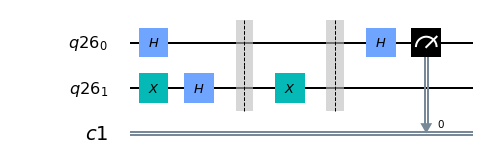

In [31]:
q=QuantumRegister(2)
qc=QuantumCircuit(q)
c=ClassicalRegister(1)
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
    
qc.barrier()
### YOUR CODE HERE (1 Line)
qc.x(q[1])
### END YOUR CODE
qc.barrier()
    
qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output = 'mpl')

In [32]:
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'0': 50}


### Circuit with balanced function 
Variable output, outputs the input. Circuit is implemented with CNOT gate from the qubit 0 to qubit 1

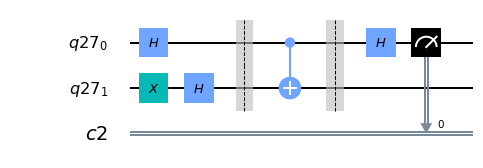

In [33]:
q=QuantumRegister(2)
qc=QuantumCircuit(q)
c=ClassicalRegister(1)
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])

qc.barrier()
### YOUR CODE HERE (1 Line)
qc.cx(q[0], q[1])
### END YOUR CODE
qc.barrier()

qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output='mpl')

In [34]:
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'1': 50}


### Circuit with balanced function 
Variable output, outputs the inverse of the input.  
Circuit is implemented with CNOT gate from the qubit 0 to qubit 1, followed with the bit flip of the qubit 1

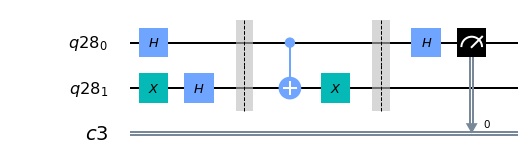

In [35]:
q=QuantumRegister(2)
qc=QuantumCircuit(q)
c=ClassicalRegister(1)
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
      
qc.barrier()
### YOUR CODE HERE (1 or 2 Lines)
qc.cx(q[0], q[1]), qc.x(q[1])
### END YOUR CODE
qc.barrier()

qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output = 'mpl')

In [34]:
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'1': 50}


### Put all these functions together

In [35]:
def blackbox(oracleType=None):

    if oracleType == None:
        oracleType = np.random.randint(4)

    oracles = {0: 'qc.iden(q[1])', 1: 'qc.x(q[1])', 2: 'qc.cx(q[0], q[1])', 3: 'qc.cx(q[0], q[1]), qc.x(q[1])'}
    return oracles[oracleType]

In [1]:
q=QuantumRegister(2, 'q')
qc=QuantumCircuit(q)
c=ClassicalRegister(1, 'c')
qc.add_register(c)

qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
      
qc.barrier()

exec(blackbox())

qc.barrier()

qc.h(q[0])
qc.measure(q[0],c[0])
qc.draw(output = 'mpl')

NameError: name 'QuantumRegister' is not defined

In [37]:
job = execute(qc, qasm_sim, shots=50)
results = job.result().get_counts()
print(results)

{'0': 50}


### End of the Training

# THANK YOU !

Sasha.Lazarevic@ch.ibm.com  
https://www.linkedin.com/in/lzrvc/  
http://LZRVC.com  